# Phase 2: Exploratory Data Analysis (EDA)

**Project**: House Price Estimation and Analysis Using King County Housing Data

**Team**: Ashwin, Ashwath, Namrata Mane

**Course**: DA 591 - Final Semester Project

---

In this notebook, we will explore the cleaned dataset to understand patterns and relationships. The steps include:
1. Loading the cleaned data
2. Understanding the target variable (price)
3. Analyzing feature distributions
4. Correlation analysis
5. Visualizing relationships between features and price
6. Selecting features for the model

## Step 1: Import Required Libraries

We will use pandas for data, matplotlib and seaborn for visualizations.

In [3]:
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better looking charts
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Make plots bigger
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## Step 2: Load the Cleaned Dataset

Loading the cleaned data that we prepared in Phase 1.

In [5]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_house_data.csv')

print(f"Dataset loaded successfully!")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataset loaded successfully!
Number of rows: 21436
Number of columns: 28


In [6]:
# Quick look at the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age,renovated,price_per_sqft,has_basement,total_rooms
0,9106000005,2015-05-27,1310000.0,4,2.25,3750,5000,2.0,0,0,...,-122.303,2170,4590,2015,5,91,0,349.333333,1,6.25
1,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0,0,...,-122.308,920,6380,2015,5,74,0,320.503597,1,3.75
2,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0,0,...,-122.144,1870,7650,2015,5,55,0,240.641711,0,7.00
3,8730000270,2015-05-14,359000.0,2,2.75,1370,1140,2.0,0,0,...,-122.343,1370,1090,2015,5,6,0,262.043796,1,4.75
4,9178601660,2015-05-14,1695000.0,5,3.00,3320,5354,2.0,0,0,...,-122.331,2330,4040,2015,5,11,0,510.542169,0,8.00


In [7]:
# List all columns
print("Columns in the dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Columns in the dataset:
1. id
2. date
3. price
4. bedrooms
5. bathrooms
6. sqft_living
7. sqft_lot
8. floors
9. waterfront
10. view
11. condition
12. grade
13. sqft_above
14. sqft_basement
15. yr_built
16. yr_renovated
17. zipcode
18. lat
19. long
20. sqft_living15
21. sqft_lot15
22. sale_year
23. sale_month
24. house_age
25. renovated
26. price_per_sqft
27. has_basement
28. total_rooms


## Step 3: Analyze the Target Variable (Price)

Let's understand the distribution of house prices - this is what we're trying to predict.

In [8]:
# Basic statistics for price
print("Price Statistics:")
print(f"Minimum: ${df['price'].min():,.0f}")
print(f"Maximum: ${df['price'].max():,.0f}")
print(f"Mean: ${df['price'].mean():,.0f}")
print(f"Median: ${df['price'].median():,.0f}")
print(f"Standard Deviation: ${df['price'].std():,.0f}")

Price Statistics:
Minimum: $75,000
Maximum: $7,700,000
Mean: $541,650
Median: $450,000
Standard Deviation: $367,315


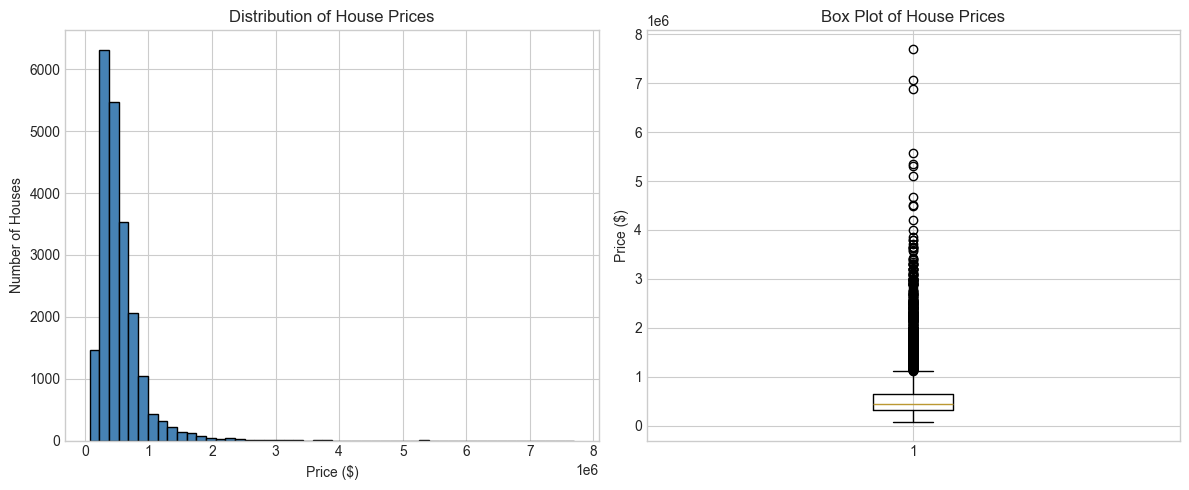

In [9]:
# Plot the distribution of house prices
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=50, color='steelblue', edgecolor='black')
plt.xlabel('Price ($)')
plt.ylabel('Number of Houses')
plt.title('Distribution of House Prices')

# Box plot to see outliers
plt.subplot(1, 2, 2)
plt.boxplot(df['price'], vert=True)
plt.ylabel('Price ($)')
plt.title('Box Plot of House Prices')

plt.tight_layout()
plt.show()

In [10]:
# Looking at the histogram, we can see the distribution is right-skewed
# Most houses are in the lower price range, with few expensive ones

# Let's check price ranges
print("Price Ranges:")
print(f"Houses under $300,000: {len(df[df['price'] < 300000])} ({len(df[df['price'] < 300000])/len(df)*100:.1f}%)")
print(f"Houses $300,000 - $600,000: {len(df[(df['price'] >= 300000) & (df['price'] < 600000)])} ({len(df[(df['price'] >= 300000) & (df['price'] < 600000)])/len(df)*100:.1f}%)")
print(f"Houses $600,000 - $1,000,000: {len(df[(df['price'] >= 600000) & (df['price'] < 1000000)])} ({len(df[(df['price'] >= 600000) & (df['price'] < 1000000)])/len(df)*100:.1f}%)")
print(f"Houses over $1,000,000: {len(df[df['price'] >= 1000000])} ({len(df[df['price'] >= 1000000])/len(df)*100:.1f}%)")

Price Ranges:
Houses under $300,000: 4339 (20.2%)
Houses $300,000 - $600,000: 10749 (50.1%)
Houses $600,000 - $1,000,000: 4862 (22.7%)
Houses over $1,000,000: 1486 (6.9%)


## Step 4: Analyze Key Features

Let's look at the main features that might affect house prices.

In [11]:
# Bedrooms distribution
print("Bedrooms Distribution:")
print(df['bedrooms'].value_counts().sort_index())

Bedrooms Distribution:
bedrooms
0       13
1      194
2     2736
3     9732
4     6849
5     1586
6      265
7       38
8       13
9        6
10       3
11       1
Name: count, dtype: int64


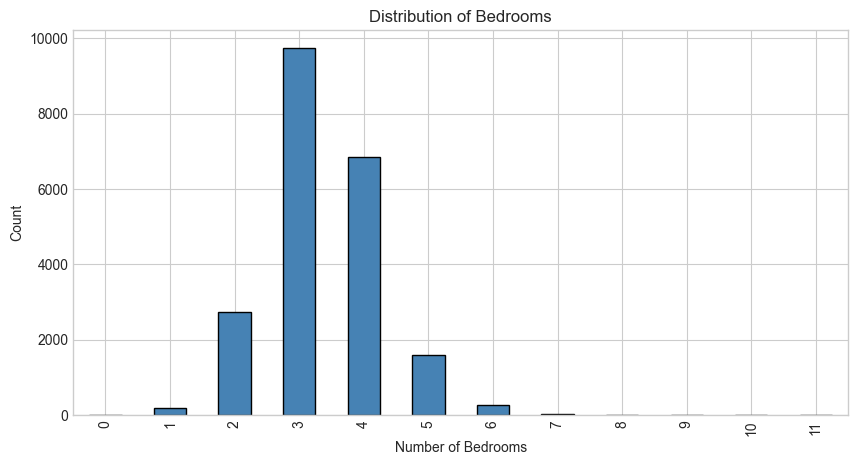


Most houses have 3-4 bedrooms.


In [12]:
# Plot bedrooms distribution
plt.figure(figsize=(10, 5))
df['bedrooms'].value_counts().sort_index().plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.title('Distribution of Bedrooms')
plt.show()

print("\nMost houses have 3-4 bedrooms.")

In [13]:
# Square footage statistics
print("Square Footage (sqft_living) Statistics:")
print(f"Minimum: {df['sqft_living'].min():,} sq ft")
print(f"Maximum: {df['sqft_living'].max():,} sq ft")
print(f"Mean: {df['sqft_living'].mean():,.0f} sq ft")
print(f"Median: {df['sqft_living'].median():,.0f} sq ft")

Square Footage (sqft_living) Statistics:
Minimum: 290 sq ft
Maximum: 13,540 sq ft
Mean: 2,083 sq ft
Median: 1,920 sq ft


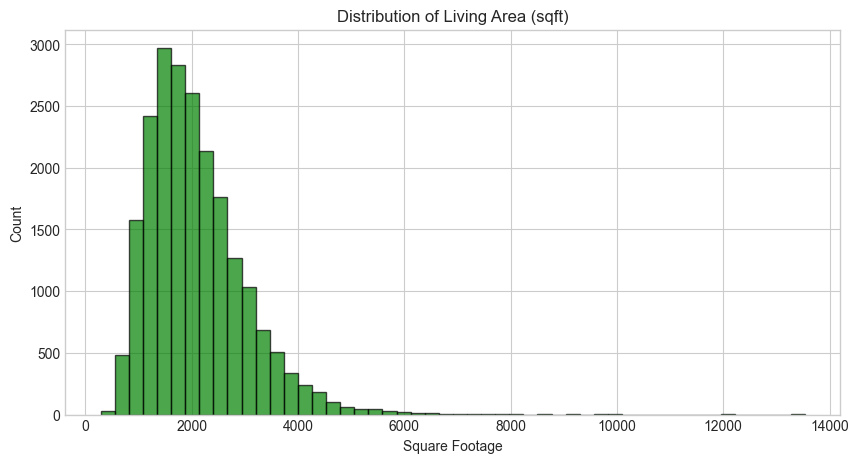

In [14]:
# Plot sqft_living distribution
plt.figure(figsize=(10, 5))
plt.hist(df['sqft_living'], bins=50, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Square Footage')
plt.ylabel('Count')
plt.title('Distribution of Living Area (sqft)')
plt.show()

In [15]:
# Grade distribution (construction quality)
print("Grade Distribution (Construction Quality 1-13):")
print(df['grade'].value_counts().sort_index())

Grade Distribution (Construction Quality 1-13):
grade
1        1
3        3
4       29
5      234
6     1995
7     8896
8     6044
9     2606
10    1130
11     396
12      89
13      13
Name: count, dtype: int64


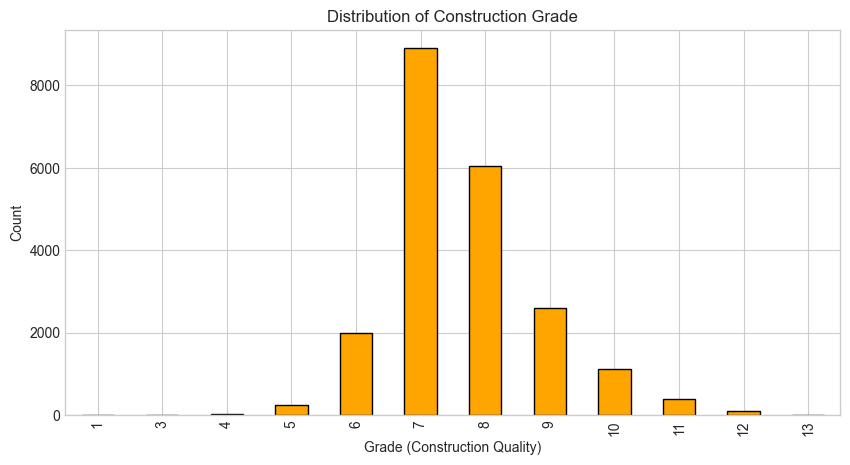


Most houses have grade 7-8 (average to good quality).


In [16]:
# Plot grade distribution
plt.figure(figsize=(10, 5))
df['grade'].value_counts().sort_index().plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel('Grade (Construction Quality)')
plt.ylabel('Count')
plt.title('Distribution of Construction Grade')
plt.show()

print("\nMost houses have grade 7-8 (average to good quality).")

In [17]:
# Condition distribution
print("Condition Distribution (1-5):")
print(df['condition'].value_counts().sort_index())

Condition Distribution (1-5):
condition
1       29
2      164
3    13911
4     5645
5     1687
Name: count, dtype: int64


In [18]:
# Waterfront properties
print("Waterfront Properties:")
print(df['waterfront'].value_counts())
print(f"\nOnly {df['waterfront'].sum()} houses ({df['waterfront'].mean()*100:.2f}%) are waterfront.")

Waterfront Properties:
waterfront
0    21273
1      163
Name: count, dtype: int64

Only 163 houses (0.76%) are waterfront.


## Step 5: Correlation Analysis

Let's find which features are most strongly related to price. This will help us choose features for our model.

In [19]:
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove id column as it's not useful
if 'id' in numeric_cols:
    numeric_cols.remove('id')

print(f"Numeric columns for correlation analysis: {len(numeric_cols)}")
print(numeric_cols)

Numeric columns for correlation analysis: 26
['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sale_year', 'sale_month', 'house_age', 'renovated', 'price_per_sqft', 'has_basement', 'total_rooms']


In [20]:
# Calculate correlation with price
correlations = df[numeric_cols].corr()['price'].drop('price').sort_values(ascending=False)

print("Correlation with Price (sorted by strength):")
print("="*50)
for feature, corr in correlations.items():
    print(f"{feature:20} : {corr:.3f}")

Correlation with Price (sorted by strength):
sqft_living          : 0.701
grade                : 0.666
sqft_above           : 0.605
sqft_living15        : 0.584
price_per_sqft       : 0.553
bathrooms            : 0.524
total_rooms          : 0.470
view                 : 0.397
sqft_basement        : 0.324
bedrooms             : 0.316
lat                  : 0.307
waterfront           : 0.267
floors               : 0.255
has_basement         : 0.180
yr_renovated         : 0.127
renovated            : 0.126
sqft_lot             : 0.089
sqft_lot15           : 0.082
yr_built             : 0.051
condition            : 0.035
long                 : 0.019
sale_year            : 0.001
sale_month           : -0.008
zipcode              : -0.051
house_age            : -0.051


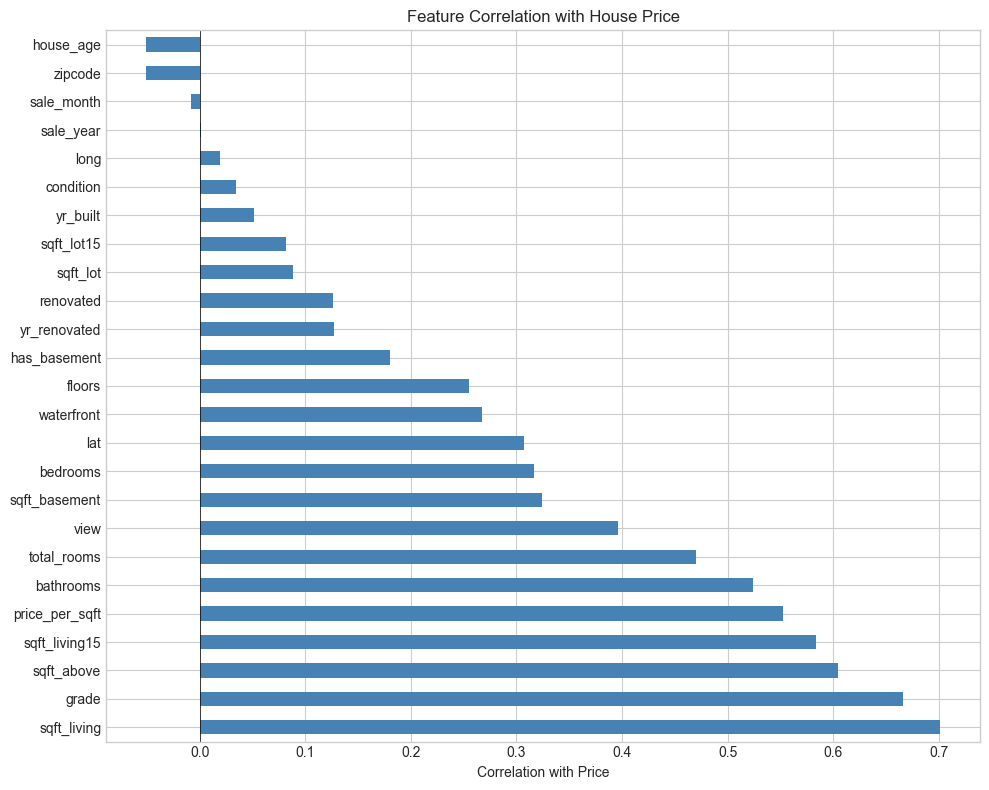

In [21]:
# Plot correlation with price
plt.figure(figsize=(10, 8))
correlations.plot(kind='barh', color='steelblue')
plt.xlabel('Correlation with Price')
plt.title('Feature Correlation with House Price')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

In [22]:
# Identify strong correlations (above 0.3 or below -0.3)
print("\nStrong Correlations with Price (|r| > 0.3):")
print("="*50)
strong_corr = correlations[abs(correlations) > 0.3]
for feature, corr in strong_corr.items():
    direction = "positive" if corr > 0 else "negative"
    print(f"{feature:20} : {corr:.3f} ({direction})")


Strong Correlations with Price (|r| > 0.3):
sqft_living          : 0.701 (positive)
grade                : 0.666 (positive)
sqft_above           : 0.605 (positive)
sqft_living15        : 0.584 (positive)
price_per_sqft       : 0.553 (positive)
bathrooms            : 0.524 (positive)
total_rooms          : 0.470 (positive)
view                 : 0.397 (positive)
sqft_basement        : 0.324 (positive)
bedrooms             : 0.316 (positive)
lat                  : 0.307 (positive)


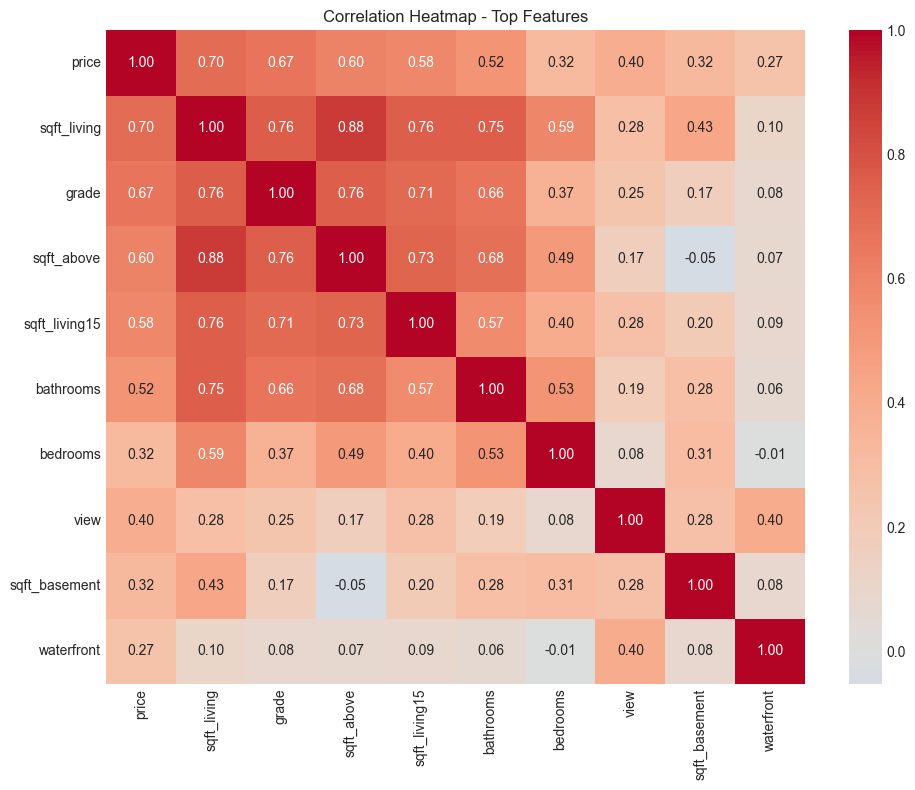

In [23]:
# Create a correlation heatmap for top features
top_features = ['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 
                'bathrooms', 'bedrooms', 'view', 'sqft_basement', 'waterfront']

plt.figure(figsize=(10, 8))
correlation_matrix = df[top_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap - Top Features')
plt.tight_layout()
plt.show()

## Step 6: Visualize Relationships with Price

Let's create scatter plots to see how features relate to price.

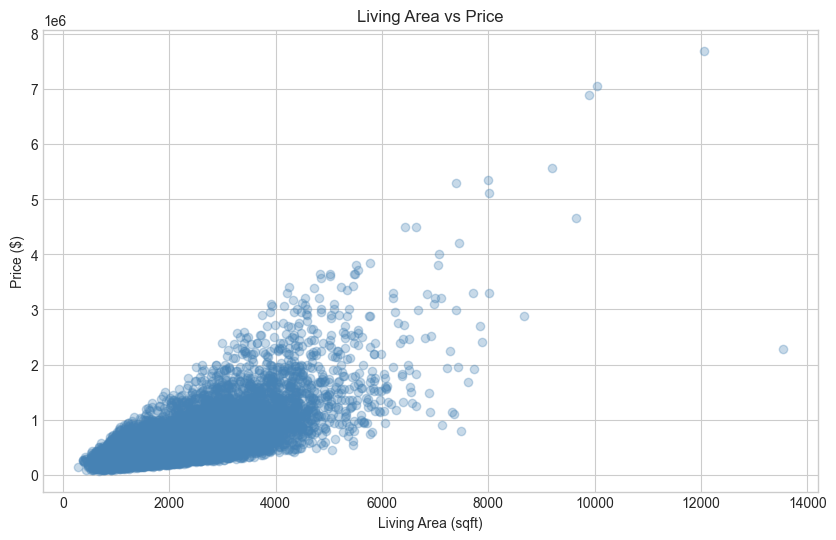

Clear positive relationship: Larger houses tend to cost more.


In [24]:
# Scatter plot: sqft_living vs price
plt.figure(figsize=(10, 6))
plt.scatter(df['sqft_living'], df['price'], alpha=0.3, color='steelblue')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price ($)')
plt.title('Living Area vs Price')
plt.show()

print("Clear positive relationship: Larger houses tend to cost more.")

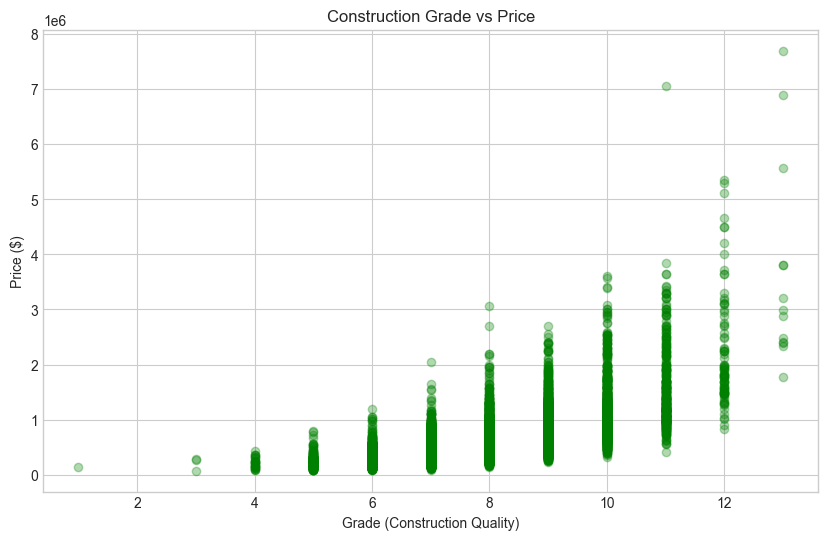

Better construction quality (higher grade) = higher price.


In [25]:
# Scatter plot: grade vs price
plt.figure(figsize=(10, 6))
plt.scatter(df['grade'], df['price'], alpha=0.3, color='green')
plt.xlabel('Grade (Construction Quality)')
plt.ylabel('Price ($)')
plt.title('Construction Grade vs Price')
plt.show()

print("Better construction quality (higher grade) = higher price.")

<Figure size 1200x600 with 0 Axes>

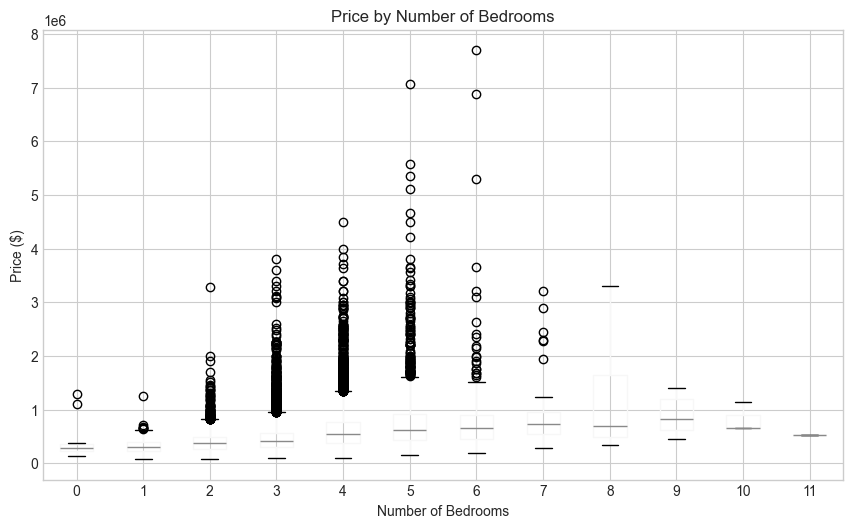

More bedrooms generally means higher price, but it levels off after 5-6.


In [26]:
# Box plot: bedrooms vs price
plt.figure(figsize=(12, 6))
df.boxplot(column='price', by='bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($)')
plt.title('Price by Number of Bedrooms')
plt.suptitle('')  # Remove automatic title
plt.show()

print("More bedrooms generally means higher price, but it levels off after 5-6.")

<Figure size 800x600 with 0 Axes>

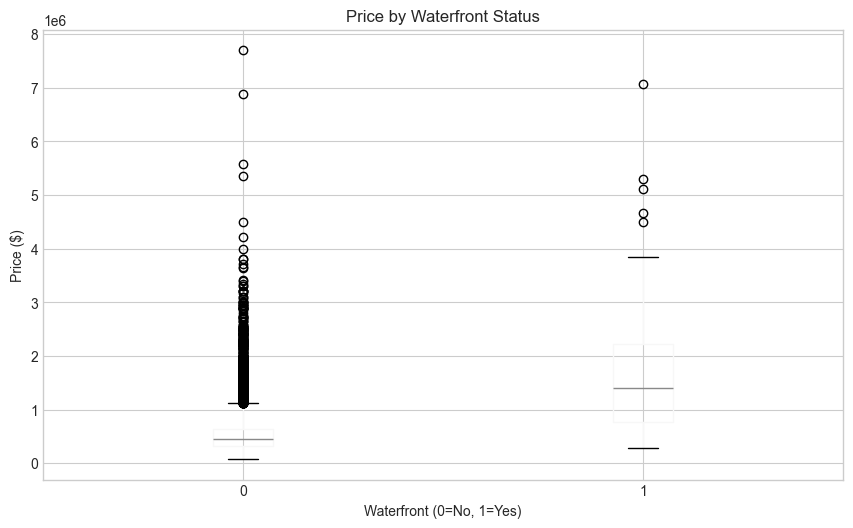

Average price without waterfront: $533,066
Average price with waterfront: $1,661,876

Waterfront homes cost $1,128,810 more on average!


In [27]:
# Box plot: waterfront vs price
plt.figure(figsize=(8, 6))
df.boxplot(column='price', by='waterfront')
plt.xlabel('Waterfront (0=No, 1=Yes)')
plt.ylabel('Price ($)')
plt.title('Price by Waterfront Status')
plt.suptitle('')
plt.show()

# Calculate average prices
avg_no_waterfront = df[df['waterfront']==0]['price'].mean()
avg_waterfront = df[df['waterfront']==1]['price'].mean()
print(f"Average price without waterfront: ${avg_no_waterfront:,.0f}")
print(f"Average price with waterfront: ${avg_waterfront:,.0f}")
print(f"\nWaterfront homes cost ${avg_waterfront - avg_no_waterfront:,.0f} more on average!")

<Figure size 1000x600 with 0 Axes>

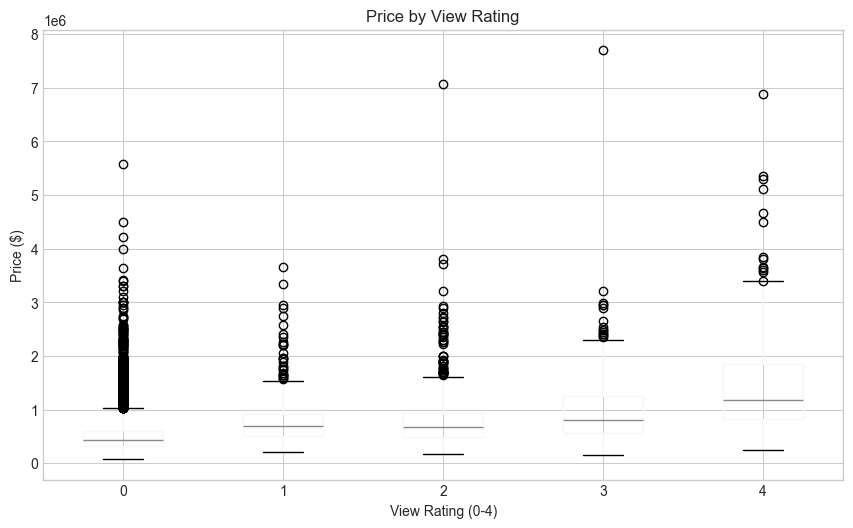

Better views definitely increase house prices.


In [28]:
# Box plot: view vs price
plt.figure(figsize=(10, 6))
df.boxplot(column='price', by='view')
plt.xlabel('View Rating (0-4)')
plt.ylabel('Price ($)')
plt.title('Price by View Rating')
plt.suptitle('')
plt.show()

print("Better views definitely increase house prices.")

<Figure size 1000x600 with 0 Axes>

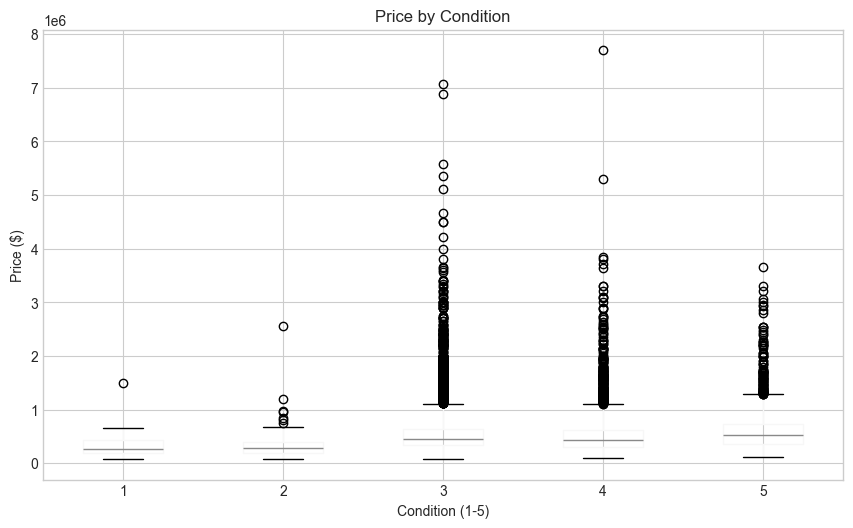

Condition has less impact on price than expected.


In [29]:
# Box plot: condition vs price
plt.figure(figsize=(10, 6))
df.boxplot(column='price', by='condition')
plt.xlabel('Condition (1-5)')
plt.ylabel('Price ($)')
plt.title('Price by Condition')
plt.suptitle('')
plt.show()

print("Condition has less impact on price than expected.")

## Step 7: Location Analysis

Let's see how location (latitude/longitude) affects price.

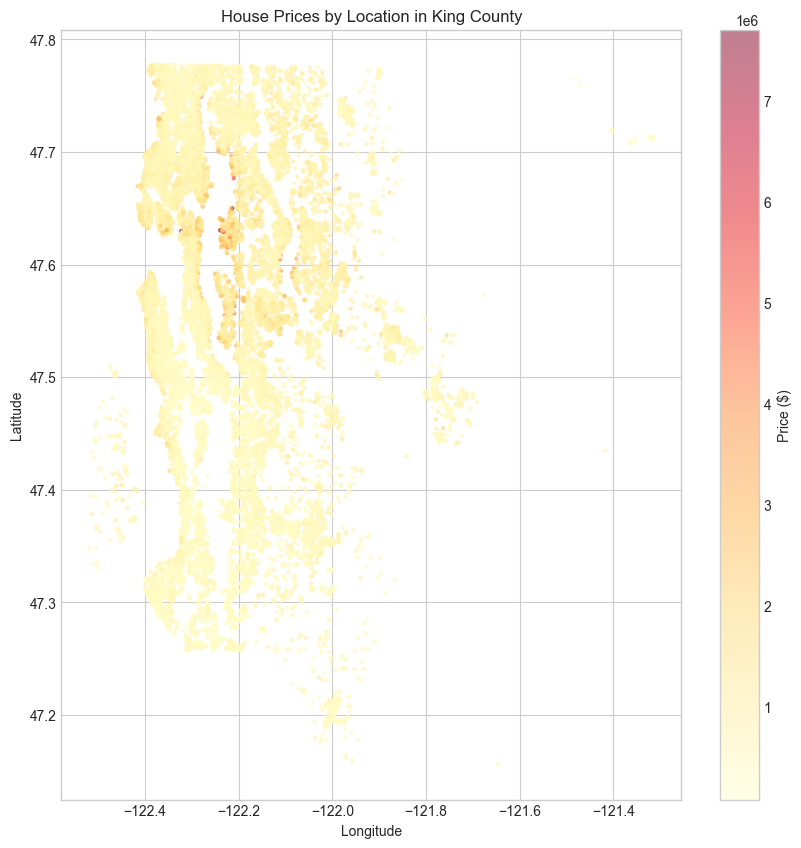

Darker red = higher prices. Some areas are clearly more expensive.


In [30]:
# Scatter plot of house locations, colored by price
plt.figure(figsize=(10, 10))
plt.scatter(df['long'], df['lat'], c=df['price'], cmap='YlOrRd', alpha=0.5, s=5)
plt.colorbar(label='Price ($)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Prices by Location in King County')
plt.show()

print("Darker red = higher prices. Some areas are clearly more expensive.")

In [31]:
# Average price by zipcode - top 10 most expensive
avg_price_by_zip = df.groupby('zipcode')['price'].mean().sort_values(ascending=False)

print("Top 10 Most Expensive Zipcodes:")
print("="*40)
for i, (zipcode, avg_price) in enumerate(avg_price_by_zip.head(10).items(), 1):
    print(f"{i}. {zipcode}: ${avg_price:,.0f}")

Top 10 Most Expensive Zipcodes:
1. 98039: $2,186,843
2. 98004: $1,355,387
3. 98040: $1,194,230
4. 98112: $1,096,192
5. 98102: $901,258
6. 98109: $879,624
7. 98105: $862,825
8. 98006: $857,875
9. 98119: $849,448
10. 98005: $810,165


In [32]:
# Top 10 cheapest zipcodes
print("\nTop 10 Cheapest Zipcodes:")
print("="*40)
for i, (zipcode, avg_price) in enumerate(avg_price_by_zip.tail(10).items(), 1):
    print(f"{i}. {zipcode}: ${avg_price:,.0f}")


Top 10 Cheapest Zipcodes:
1. 98031: $301,169
2. 98030: $297,939
3. 98003: $295,812
4. 98188: $290,034
5. 98023: $288,438
6. 98148: $288,112
7. 98001: $281,872
8. 98032: $253,317
9. 98168: $242,448
10. 98002: $234,607


## Step 8: Feature Selection for Model

Based on our analysis, let's select the features we'll use for the Linear Regression model.

In [33]:
# Features we'll use for the model
# Selected based on:
# 1. Strong correlation with price
# 2. Makes logical sense for house pricing

selected_features = [
    'sqft_living',      # Strongest correlation (0.70)
    'grade',            # Strong correlation (0.67)
    'sqft_above',       # Strong correlation (0.61)
    'sqft_living15',    # Strong correlation (0.59)
    'bathrooms',        # Moderate correlation (0.53)
    'view',             # Moderate correlation (0.40)
    'bedrooms',         # Some correlation (0.31)
    'waterfront',       # Some correlation (0.27)
    'floors',           # Some correlation (0.26)
    'lat'               # Location matters (0.31)
]

print("Selected Features for Linear Regression Model:")
print("="*50)
for i, feature in enumerate(selected_features, 1):
    corr = df[feature].corr(df['price'])
    print(f"{i}. {feature:15} (correlation: {corr:.3f})")

Selected Features for Linear Regression Model:
1. sqft_living     (correlation: 0.701)
2. grade           (correlation: 0.666)
3. sqft_above      (correlation: 0.605)
4. sqft_living15   (correlation: 0.584)
5. bathrooms       (correlation: 0.524)
6. view            (correlation: 0.397)
7. bedrooms        (correlation: 0.316)
8. waterfront      (correlation: 0.267)
9. floors          (correlation: 0.255)
10. lat             (correlation: 0.307)


In [34]:
# Features we're NOT using and why:
print("\nFeatures NOT included:")
print("="*50)
print("id           - Just an identifier, not a predictor")
print("date         - Already extracted sale_year from it")
print("zipcode      - Too many categories (70+), use lat/long instead")
print("sqft_lot     - Low correlation, lot size less important")
print("sqft_basement- Already captured in sqft_living")
print("yr_built     - Using house_age instead")
print("yr_renovated - Using binary 'renovated' instead")
print("long         - Using lat is enough for location effect")


Features NOT included:
id           - Just an identifier, not a predictor
date         - Already extracted sale_year from it
zipcode      - Too many categories (70+), use lat/long instead
sqft_lot     - Low correlation, lot size less important
sqft_basement- Already captured in sqft_living
yr_built     - Using house_age instead
yr_renovated - Using binary 'renovated' instead
long         - Using lat is enough for location effect


In [35]:
# Save the selected features list for the next phase
print("\nTotal features selected:", len(selected_features))
print("\nThese features will be used in Phase 3 (Model Building)")


Total features selected: 10

These features will be used in Phase 3 (Model Building)


## Summary of EDA Findings

### Key Insights:

1. **Price Distribution**: Most houses are priced between $200,000 - $600,000. The distribution is right-skewed with some luxury homes over $1 million.

2. **Strongest Predictors** (highest correlation with price):
   - sqft_living (0.70) - Living area is the best predictor
   - grade (0.67) - Construction quality matters a lot
   - sqft_above (0.61) - Above ground space
   - sqft_living15 (0.59) - Neighborhood matters
   - bathrooms (0.53) - Number of bathrooms

3. **Location Matters**: Waterfront properties cost significantly more. Some zipcodes have much higher average prices.

4. **View Impact**: Better views (rating 3-4) significantly increase price.

5. **Bedrooms**: More bedrooms generally means higher price, but effect diminishes after 5-6 bedrooms.

### Next Steps:
- Phase 3: Build Linear Regression model using the 10 selected features
- Evaluate model using R² and RMSE